<a href="https://colab.research.google.com/github/intrastella/DLGadgets/blob/main/complex_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cplot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.2 MB/s eta 0:00:00


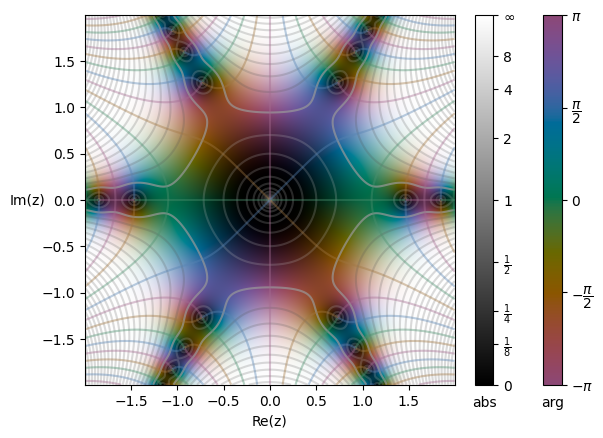

In [ ]:
import numpy as np

import cplot

def f(z):
    return np.sin(z**3) / z


plt = cplot.plot(
    f,
    (-2.0, +2.0, 400),
    (-2.0, +2.0, 400),
    # abs_scaling=lambda x: x / (x + 1),  # how to scale the lightness in domain coloring
    # contours_abs=2.0,
    # contours_arg=(-np.pi / 2, 0, np.pi / 2, np.pi),
    # emphasize_abs_contour_1: bool = True,
    # add_colorbars: bool = True,
    # add_axes_labels: bool = True,
    # saturation_adjustment: float = 1.28,
    # min_contour_length = None,
    # linewidth = None,
)
plt.show()


In [ ]:
!pip install alphashape
!pip install descartes

[[ 1.01910953e+00  1.02005726e+00  1.02105190e+00 ...  4.27810376e+76
   2.41336615e+80  1.95305523e+84]
 [ 1.01868652e+00  1.01961285e+00  1.02058498e+00 ... -1.14513865e+71
  -3.58803891e+74 -2.75473419e+78]
 [ 1.01821988e+00  1.01912267e+00  1.02007001e+00 ... -9.38499228e+65
  -1.18345005e+69  1.06923497e+71]
 ...
 [ 1.01821988e+00  1.01912267e+00  1.02007001e+00 ... -9.38499228e+65
  -1.18345005e+69  1.06923497e+71]
 [ 1.01868652e+00  1.01961285e+00  1.02058498e+00 ... -1.14513865e+71
  -3.58803891e+74 -2.75473419e+78]
 [ 1.01910953e+00  1.02005726e+00  1.02105190e+00 ...  4.27810376e+76
   2.41336615e+80  1.95305523e+84]]
[[ 8.29038198e-03  8.70128291e-03  9.13300498e-03 ...  1.14625728e+76
  -1.78001581e+79  5.29583914e+83]
 [ 9.20515084e-03  9.66130524e-03  1.01405260e-02 ...  2.17218412e+71
   5.88641825e+74  7.54993123e+77]
 [ 1.00980153e-02  1.05982721e-02  1.11237753e-02 ... -4.79617371e+64
  -6.08810390e+68 -2.67784407e+72]
 ...
 [-1.00980153e-02 -1.05982721e-02 -1.1123775

<ipython-input-192-9548c76cdd1c>:218: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.2, w_pad=0.3, h_pad=0.4)


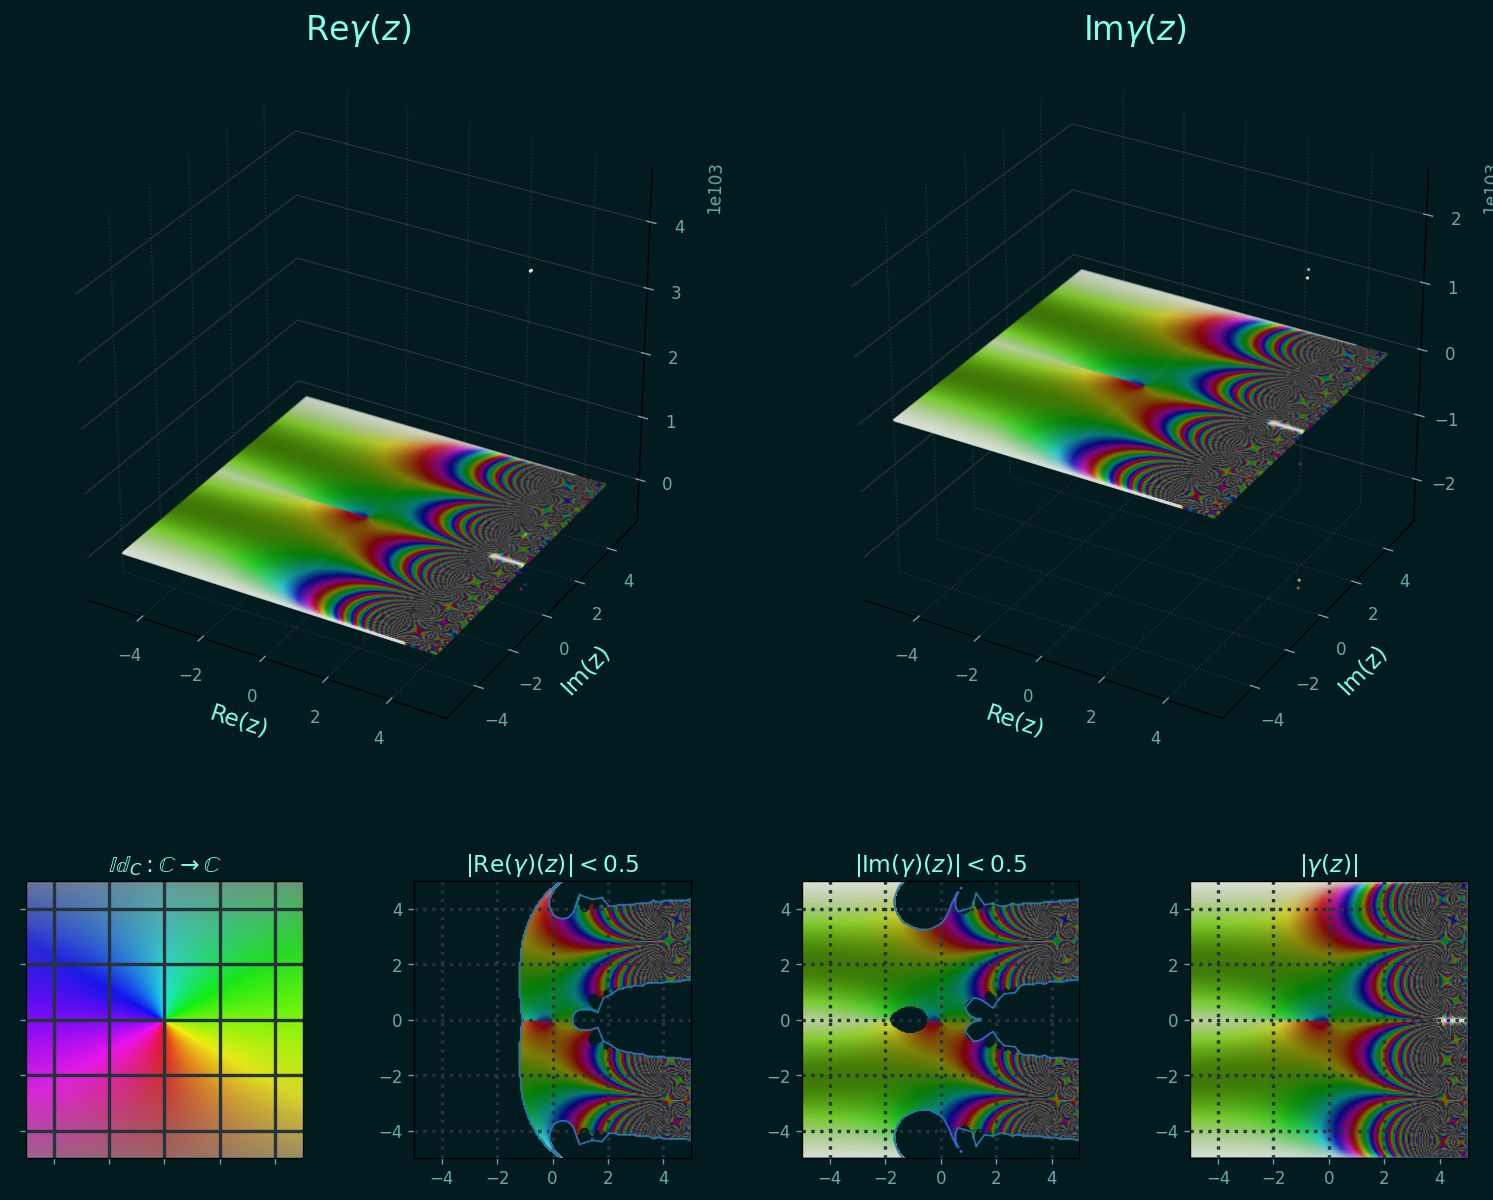

(<Figure size 1920x1440 with 6 Axes>,)

In [ ]:
import time
import descartes
import alphashape
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import matplotlib.animation as mat_anima

from typing import Callable
from functools import partial
from matplotlib import cm
from colorsys import hls_to_rgb, rgb_to_hls, hsv_to_rgb
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LightSource
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler


mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'cm'

class ComplexPlot():

    def __init__(self, complex_function: Callable, name: str, title: str) -> None:
        self.complex_function = complex_function
        self.name = name
        self. title = title
        self.anim = None
        self.fig = plt.figure(figsize=(16, 12), dpi=(1920/16))
        gs = self.fig.add_gridspec(6, 4, hspace=2)
        self.ax1 = self.fig.add_subplot(gs[:4, :2], projection='3d')
        self.ax2 = self.fig.add_subplot(gs[:4, 2:], projection='3d')
        self.ax3 = self.fig.add_subplot(gs[4:, 0])
        self.ax4 = self.fig.add_subplot(gs[4:, 1])
        self.ax5 = self.fig.add_subplot(gs[4:, 2])
        self.ax6 = self.fig.add_subplot(gs[4:, 3])
        self.set_design()

    def cartiesian_coord(self):
        real_points = np.linspace(-5, 5, num=200)
        imag_points = np.linspace(-5, 5, num=200)
        X, Y = np.meshgrid(real_points, imag_points)
        return X, Y

    def polar_coord(self):
        real_points = np.linspace(0, 2*np.pi, num=200)
        imag_points = np.linspace(0, 2*np.pi, num=200)
        real_grid, imag_grid = np.meshgrid(real_points, imag_points)
        X, Y = real_grid*np.cos(imag_grid), real_grid*np.sin(imag_grid)
        return X, Y

    def exec(self):
        X, Y = self.cartiesian_coord()
        complex_array = X + 1j * Y
        Z = self.complex_function(complex_array)
        print(Z.real)
        print(Z.imag)
        return X, Y, Z.real, Z.imag

    def surface(self, x, y, z_real, z_im):
        cmap = mpl.colormaps['twilight_shifted']
        sns_cmap = ListedColormap(sns.color_palette("hls", 360).as_hex())

        self.ax1.plot_surface(x, y, z_real,
                             rstride=1,
                             cstride=1,
                             cmap=sns_cmap,
                             shade=True,
                             linewidth=0,
                             antialiased=False)

    def wire(self, x, y, z_real, z_im):
        cmap = mpl.colormaps['twilight_shifted']
        colors = cm.viridis(z_real)
        rcount, ccount, _ = colors.shape

        surf = self.ax1.plot_surface(x, y, z_real,
                                    rstride=10,
                                    cstride=10,
                                    facecolors=colors,
                                    shade=False)

        surf.set_facecolor((0,0,0,0))

    def boundary(self, x, y, z_0, ax):
        x = x[z_0[:, 0], z_0[:, 1]]
        y = y[z_0[:, 0], z_0[:, 1]]

        points = np.column_stack((x, y))
        alpha_shape = alphashape.alphashape(points, 3.5)

        if alpha_shape.geom_type == 'Polygon':
          ax.plot(*alpha_shape.exterior.xy, lw=1)

        else:
          for i in range(len(alpha_shape.geoms)):
            poly = alpha_shape.geoms[i]
            ax.plot(*poly.exterior.xy, lw=1)

    def zero_level(self, x, y, z_real, z_im):
        colors = self.get_complex_colors(z_real, z_im, z_real)
        z_0 = np.argwhere(np.abs(z_real) < 0.5)
        self.get_zeros(self.ax4, x, y, z_real, z_im, z_0, colors)
        self.boundary(x, y, z_0, self.ax4)

        colors = self.get_complex_colors(z_real, z_im, z_im)
        z_0 = np.argwhere(np.abs(z_im) < 0.5)
        self.get_zeros(self.ax5, x, y, z_real, z_im, z_0, colors)
        self.boundary(x, y, z_0, self.ax5)

        colors = self.get_complex_colors(z_real, z_im, np.ones((2, 4)))
        z_0 = np.argwhere(0. < np.sqrt(z_real**2 + z_im**2))
        self.get_zeros(self.ax6, x, y, z_real, z_im, z_0, colors)
        self.boundary(x, y, z_0, self.ax6)

    def get_zeros(self, ax, x, y, z_real, z_im, z_0, colors):
        idx = [(z_i[0] * 200) + z_i[1] for z_i in z_0]
        ax.scatter(x[z_0[:, 0], z_0[:, 1]],
                   y[z_0[:, 0], z_0[:, 1]],
                   color=colors[idx],
                   s=0.5)

    def dotted(self, x, y, z_real, z_im, plot_type):
        args_cmap = ListedColormap(sns.color_palette("hls", x.shape[1] * x.shape[1])).colors

        if plot_type == "re":
          colors = self.get_complex_colors(z_real, z_im, z_real)
          self.ax1.scatter(x.flatten(), y.flatten(), z_real.flatten(),
                            s=1,
                            color=colors)
        else:
          colors = self.get_complex_colors(z_real, z_im, z_im)
          self.ax2.scatter(x.flatten(), y.flatten(), z_im.flatten(),
                          s=1,
                          color=colors)

    def get_phase_colors(self, x, y, z_real, z_im, phase_type="func"):
        if phase_type == "func":
            func_colors = np.sqrt(z_real**2 + z_im**2)
            mono_cmap = sns.color_palette("mako", as_cmap=True)
            return func_colors, mono_cmap

        else:
          arg_colors = np.sqrt(x**2 + y**2)
          sns_cmap = ListedColormap(sns.color_palette("hls", 360))
          return arg_colors, sns_cmap

    def hls(self, x: float, saturation: float):
        return hls_to_rgb(x, .5, saturation)

    def get_rgb(self, hsv):
        # return mcolors.hsv_to_rgb(hsv)
        return hls_to_rgb(hsv[0], hsv[1], hsv[2])

    def get_complex_colors(self, x, y, function_values=np.ones(1)):
        angles_0 = np.angle(x + 1j * y)
        angles = np.rad2deg(angles_0)
        angles = (angles + 450) % 360
        angles = angles / 360

        if function_values.shape == (1,):
          brightness = z = np.ones_like(x) * .5

        else:
          function_values = np.sqrt((x**2 + y**2))
          scaler = MinMaxScaler(feature_range=(0.25, 0.85))
          brightness = scaler.fit_transform(function_values)

        # radii (distance) is makes the color more intense
        radii = -1 * np.sqrt((x**2 + y**2))
        scaler = MinMaxScaler(feature_range=(0.2, .9))
        intensity = scaler.fit_transform(radii)

        grad_radii_colors = np.stack((angles, brightness, intensity))
        grad_radii_colors = np.apply_along_axis(self.get_rgb, 0, grad_radii_colors)
        grad_radii_colors = grad_radii_colors.transpose(1, 2, 0).reshape(x.shape[0] ** 2, 3)

        return grad_radii_colors

    def get_base_coord(self):
        t = np.linspace(0, 5, 100)
        f = np.sqrt(2* t **2) * np.exp(1j * np.pi / 2)
        x, y = f.real, f.imag

        sns_cmap = self.get_complex_colors(x, y)
        self.ax3.scatter(x, y, color=sns_cmap, s=1)

    def get_colorspace(self, x, y):
        # self.get_base_coord()
        sns_cmap = self.get_complex_colors(x, y)
        self.ax3.scatter(x, y, color=sns_cmap, s=1)

    def get_color_circle(self):
        for r in np.linspace(0, 1, 75):
          u = 2* np.pi * r
          n = int(np.ceil(360 * u))

          theta = np.linspace(0, 2 * np.pi, n)
          x = np.cos(theta)
          y = np.sin(theta)

          sns_cmap = ListedColormap(sns.color_palette("hls", n)).colors
          self.ax3.scatter(r*x, r*y, color=sns_cmap, s=1)

    def init(self):
        x, y, z_real, z_im = self.exec()
        # arg_colors, sns_cmap = self.get_phase_colors(x, y, z_real, z_im, 'arg')
        self.dotted(x, y, z_real, z_im, plot_type='re')
        self.dotted(x, y, z_real, z_im, plot_type='im')
        self.zero_level(x, y, z_real, z_im)
        self.get_colorspace(x, y)
        plt.tight_layout(pad=0.2, w_pad=0.3, h_pad=0.4)
        plt.show()
        return self.fig,

    def animate(self, i):
        self.ax1.view_init(elev=10., azim=i)
        self.ax2.view_init(elev=10., azim=i)
        return self.fig,

    def plot(self):
        self.anim = FuncAnimation(self.fig,
                                  self.animate,
                                  init_func=self.init,
                                  frames=360,
                                  interval=20,
                                  blit=False)

    def save(self):
        ffmpeg_writer = mat_anima.FFMpegWriter(fps=30)
        self.anim.save(filename='default_animation.mp4',
                       fps=30,
                       bitrate=-1,
                       extra_args=['-vcodec', 'libx264'])

    def set_design(self):
        dark_green = np.array([1, 27, 31]) / 255
        gray_blue = np.array([38, 51, 59]) / 255

        for ax in [self.ax3, self.ax4, self.ax5, self.ax6]:
          ax.set_xlim(-5, 5)
          ax.set_ylim(-5, 5)
          ax.set_facecolor(dark_green)
          ax.xaxis.label.set_color('#82ffee')
          ax.yaxis.label.set_color('#82ffee')
          ax.tick_params(axis='x', colors='#6aa9b0')
          ax.tick_params(axis='y', colors='#6aa9b0')
          ax.xaxis.label.set_fontsize(14)
          ax.yaxis.label.set_fontsize(14)
          ax.grid(color=gray_blue, linewidth=2, linestyle='dotted')
          ax.set_aspect('equal')

        self.ax3.set_xticklabels([])
        self.ax3.set_yticklabels([])
        self.ax3.grid(color=gray_blue, linewidth=2, linestyle='-')

        for ax in [self.ax1, self.ax2]:
          ax.set_facecolor(dark_green)
          ax.set_aspect('equal', 'box')
          ax.set_ylabel(f'Re({self.name})')
          ax.set_ylabel(f'Im(z)')
          ax.set_xlabel(f'Re(z)')

          ax.xaxis.pane.fill = False
          ax.yaxis.pane.fill = False
          ax.zaxis.pane.fill = False
          ax.xaxis.pane.set_edgecolor(dark_green)
          ax.yaxis.pane.set_edgecolor(dark_green)
          ax.zaxis.pane.set_edgecolor(dark_green)

          ax.xaxis.label.set_color('#82ffee')
          ax.yaxis.label.set_color('#82ffee')
          ax.zaxis.label.set_color('#82ffee')
          ax.tick_params(axis='x', colors='#6aa9b0')
          ax.tick_params(axis='y', colors='#6aa9b0')
          ax.tick_params(axis='z', colors='#6aa9b0')

          ax.xaxis._axinfo['grid'].update({'color': gray_blue})
          ax.yaxis._axinfo['grid'].update({'color': gray_blue})
          ax.zaxis._axinfo['grid'].update({'color': gray_blue})

          ax.xaxis._axinfo['grid'].update({'linestyle': 'dotted'})
          ax.yaxis._axinfo['grid'].update({'linestyle': 'dotted'})

          ax.xaxis.label.set_fontsize(14)
          ax.yaxis.label.set_fontsize(14)

        self.fig.set_facecolor(dark_green)

        txt = r'$\text{Re}%s(z)$'%(self.name)
        self.ax1.set_title(txt,
                            fontweight="bold",
                            fontfamily="monospace",
                            size=20,
                            color='#82ffee')

        txt = r'$\text{Im}%s(z)$'%(self.name)
        self.ax2.set_title(txt,
                            fontweight="bold",
                            fontfamily="monospace",
                            size=20,
                            color='#82ffee')

        txt = r'$\mathbb{Id}_{C} : \mathbb{C} \rightarrow \mathbb{C}$'
        self.ax3.set_title(txt,
                            fontweight="bold",
                            size=14,
                            color='#82ffee')

        txt = r'$|\text{Re}(%s)(z)| < 0.5$'%(self.name)
        self.ax4.set_title(txt,
                            fontweight="bold",
                            size=14,
                            color='#82ffee')

        txt = r'$|\text{Im}(%s)(z)| < 0.5$'%(self.name)
        self.ax5.set_title(txt,
                            fontweight="bold",
                            size=14,
                            color='#82ffee')

        txt = r'$|%s(z)|$'%(self.name)
        self.ax6.set_title(txt,
                            fontweight="bold",
                            size=14,
                            color='#82ffee')

        # self.fig.suptitle(self.title)

a, b, c, d = 5, 1, 6, 3
# print(np.linalg.det(np.array([[a, b], [c, d]])))
def func(z):
    return np.cos(1 / z)

title = r'$\gamma(z) = \frac{5z + 1}{6z + 3}$'

anim = ComplexPlot(func, '\gamma', title)
anim.init()
# anim.plot()
# anim.save()

In [ ]:
!pip install latex


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7589 sha256=04a3921ed7d8102cf44257cea7152ba6d5c9ac8faa82457c72274a84f86eaf99
  Stored in directory: /root/.cache/pip/wheels/e5/b3/95/f4b45b5116d4585893cdcb2ac7c07614a59fb047c754c4651a
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7226 sha256=37c966d06ec5861102f68f62553e2c10293702c51b96d7e0ed75d5d7ad9f9c84
  Stored in directory: /root/.cache/pip/wheels/d2/d3/10/d5fe9bc9dcb197ea289baccca92a25f2f95135235a92ca1b11
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2766 sha256=4753e288bbca81914b9ba3ddfa780f090f5d64f335723c0f3dd70abe03f070e4
  Stored in directory: /root/.cache/pip/wheels/6a/49/7a/3997889a5643ddb4a1d21692c6916fd2fc482965211d9a3ca5
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.w